<CENTER>
</br>
<p><font size="5">  M2MO & EY - Internship </font></p>
<p><font size="5">  Modelling Initial Margin and Counterparty Risk in Uncleared Derivatives </font></p>
<p><font size="4">  SANGLIER Nathan </font></p>
<p><font size="3"></br>May 2025</font></br></div>
<p><span style="color:blue">nathan.sanglier@etu.u-paris.fr</span>
</p>
</CENTER>

## <span id="section-0" style="color:#00B8DE"> 0 - Imports & Parameters </span>

In [54]:
import  numpy                   as      np
import  matplotlib.pyplot       as      plt
from    scipy.stats             import  norm

In [55]:
r           = 0.05
S0          = 100
sigma       = 0.3
T           = 1
delta       = 1/24 # 10 business days, ie. 2 weeks
dt          = 1/240 # 1 business day

time_grid   = np.arange(0, T, dt)
N           = len(time_grid)-1
M           = 5000
tref        = 1/12
ind_tref    = int(tref/dt)

K           = 95

def beta(t):
    return np.exp(-r*t)

In [56]:
def gen_S():
    paths           = np.zeros((M, N+1))
    paths[:, 0]     = S0
    Z               = np.random.normal(0, 1, size=(M, N))
    increments      = np.exp((r-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z)
    paths[:, 1:]    = S0 * np.cumprod(increments, axis=1)
    return paths

S_paths = gen_S()

In [57]:
def gen_mtm_put(S_paths):
    M   = S_paths.shape[0]
    mtm = np.zeros((M, N+1))
    for i in range(N+1):
        d1          = (np.log(S_paths[:, i]/K) + (r + 0.5*sigma**2)*(T-time_grid[i])) / (sigma*np.sqrt(T-time_grid[i]))
        d2          = d1 - sigma*np.sqrt(T-time_grid[i])
        mtm[:, i]   = K*beta(T-time_grid[i])*norm.cdf(-d2) - S_paths[:, i]*beta(T-time_grid[i])*norm.cdf(-d1)
    return mtm

mtm_paths       = gen_mtm_put(S_paths)
mtm_diff_paths  = np.diff(mtm_paths, axis=1)

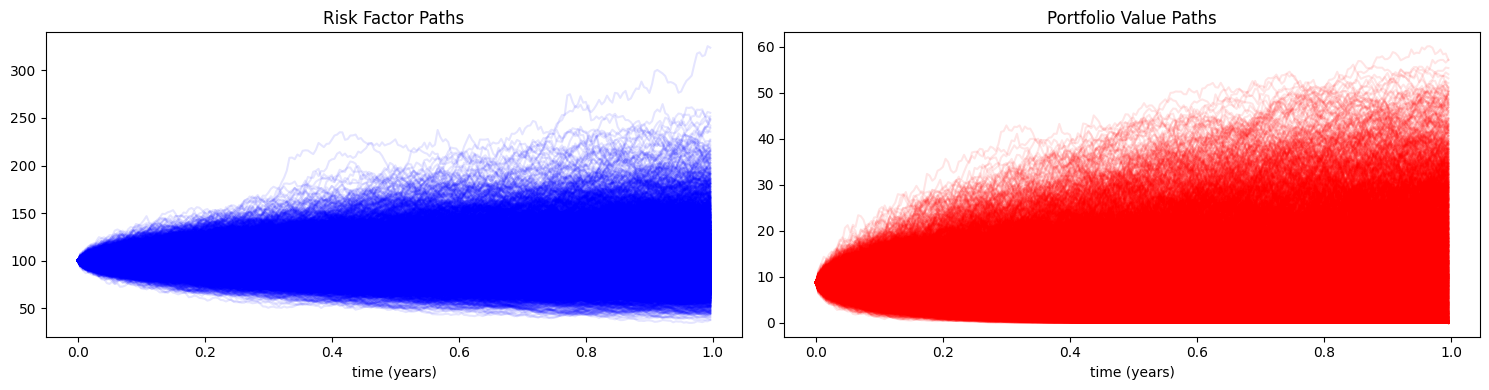

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].plot(time_grid, S_paths.T, color='blue', alpha=0.1)
axs[0].set_title('Risk Factor Paths')
axs[0].set_xlabel('time (years)')
axs[1].plot(time_grid, mtm_paths.T, color='red', alpha=0.1)
axs[1].set_title('Portfolio Value Paths')
axs[1].set_xlabel('time (years)')
plt.tight_layout()
plt.show()

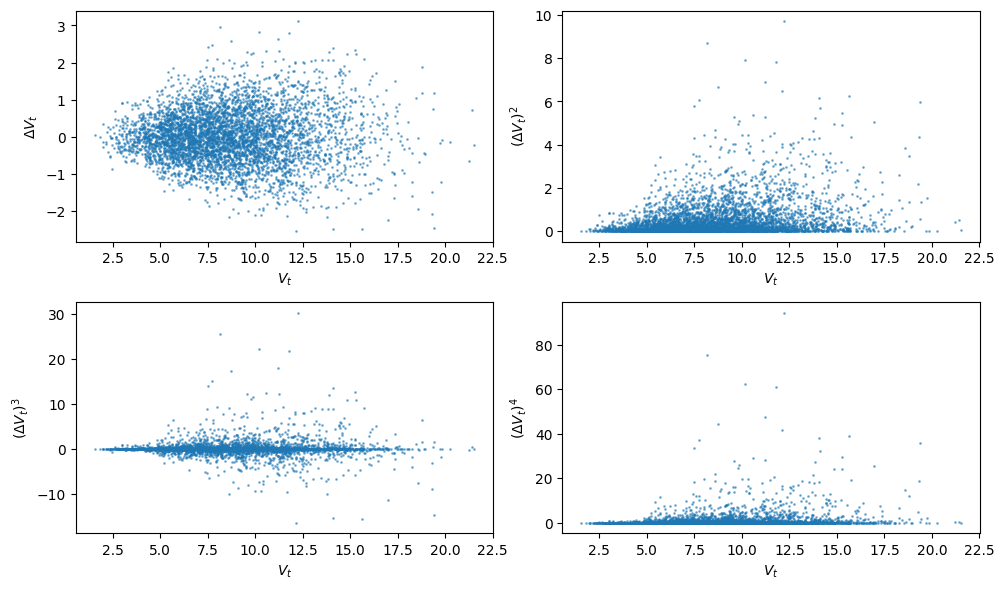

In [62]:
fi, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].scatter(mtm_paths[:, ind_tref], mtm_diff_paths[:, ind_tref], alpha=0.5, s=1)
axs[0, 0].set_xlabel('$V_t$')
axs[0, 0].set_ylabel('$\\Delta V_t$')
axs[0, 1].scatter(mtm_paths[:, ind_tref], mtm_diff_paths[:, ind_tref]**2, alpha=0.5, s=1)
axs[0, 1].set_xlabel('$V_t$')
axs[0, 1].set_ylabel('$\\left(\\Delta V_t\\right)^2$')
axs[1, 0].scatter(mtm_paths[:, ind_tref], mtm_diff_paths[:, ind_tref]**3, alpha=0.5, s=1)
axs[1, 0].set_xlabel('$V_t$')
axs[1, 0].set_ylabel('$\\left(\\Delta V_t\\right)^3$')
axs[1, 1].scatter(mtm_paths[:, ind_tref], mtm_diff_paths[:, ind_tref]**4, alpha=0.5, s=1)
axs[1, 1].set_xlabel('$V_t$')
axs[1, 1].set_ylabel('$\\left(\\Delta V_t\\right)^4$')
plt.tight_layout()
plt.show()